In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 98% 160M/163M [00:00<00:00, 270MB/s]
100% 163M/163M [00:00<00:00, 262MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_336.jpg', 'with_mask_2797.jpg', 'with_mask_1361.jpg', 'with_mask_2664.jpg', 'with_mask_195.jpg']
['with_mask_2407.jpg', 'with_mask_2328.jpg', 'with_mask_173.jpg', 'with_mask_1885.jpg', 'with_mask_868.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_710.jpg', 'without_mask_1272.jpg', 'without_mask_2332.jpg', 'without_mask_1220.jpg', 'without_mask_370.jpg']
['without_mask_1143.jpg', 'without_mask_156.jpg', 'without_mask_1618.jpg', 'without_mask_2831.jpg', 'without_mask_1168.jpg']


In [10]:
print('Number of with mask images: ', len(with_mask_files))
print('Number of without mask images: ', len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


In [11]:
# with mask -> 1
# without mask ->0

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


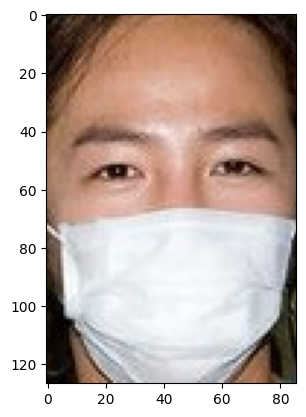

In [15]:
# Displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_336.jpg')
imgplot = plt.imshow(img)
plt.show()

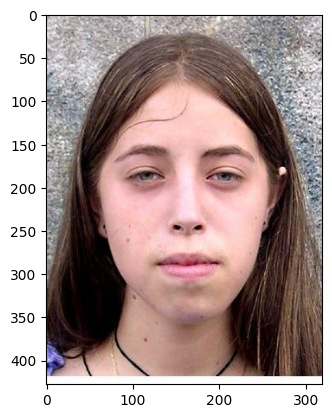

In [18]:
# Displaying with mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1272.jpg')
imgplot = plt.imshow(img)
plt.show()

In [20]:
# Image Processing
# convert images to Numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
len(data)

7553

In [22]:
type(data)

list

In [23]:
data[0]

array([[[44, 36, 25],
        [51, 44, 33],
        [51, 44, 34],
        ...,
        [23, 21,  9],
        [33, 31, 19],
        [49, 47, 35]],

       [[40, 32, 21],
        [33, 24, 14],
        [21, 12,  4],
        ...,
        [20, 16,  5],
        [30, 27, 15],
        [39, 37, 25]],

       [[15,  7,  0],
        [10,  1,  0],
        [13,  4,  4],
        ...,
        [20, 16,  7],
        [22, 18,  9],
        [22, 18,  9]],

       ...,

       [[19, 12,  6],
        [26, 20, 14],
        [34, 29, 24],
        ...,
        [55, 60, 52],
        [58, 64, 59],
        [62, 69, 65]],

       [[13,  6,  0],
        [14,  8,  3],
        [13,  8,  5],
        ...,
        [51, 60, 54],
        [53, 63, 61],
        [59, 69, 68]],

       [[ 5,  0,  0],
        [ 6,  1,  0],
        [ 8,  3,  0],
        ...,
        [53, 68, 64],
        [53, 69, 68],
        [61, 77, 77]]], dtype=uint8)

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

In [26]:
# Converting image list and label list to numpy array

X = np.array(data)
y = np.array(labels)

In [27]:
type(X)

numpy.ndarray

In [28]:
type(y)

numpy.ndarray

In [29]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [30]:
print(y)

[1 1 1 ... 0 0 0]


In [31]:
# Train Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [33]:
# Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

In [35]:
# Building Convolutional Neural Network(CNN)
import tensorflow as tf
from tensorflow import keras

In [38]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [39]:
# Compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [40]:
# training the neural network
history = model.fit(X_train_scaled, y_train, validation_split = 0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 16s 23ms/step - loss: 0.5178 - acc: 0.7666 - val_loss: 0.2830 - val_acc: 0.8876
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.3029 - acc: 0.8795 - val_loss: 0.2947 - val_acc: 0.8612
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2444 - acc: 0.9056 - val_loss: 0.2169 - val_acc: 0.9107
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2023 - acc: 0.9242 - val_loss: 0.2201 - val_acc: 0.9041
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1744 - acc: 0.9343 - val_loss: 0.1979 - val_acc: 0.9091


In [41]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test accuracy =', accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.2099 - acc: 0.9265
Test accuracy = 0.9265387058258057


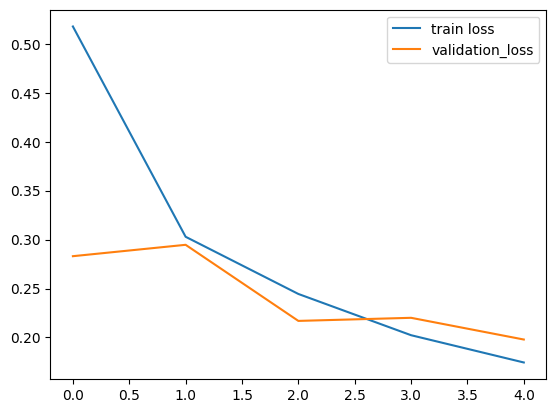

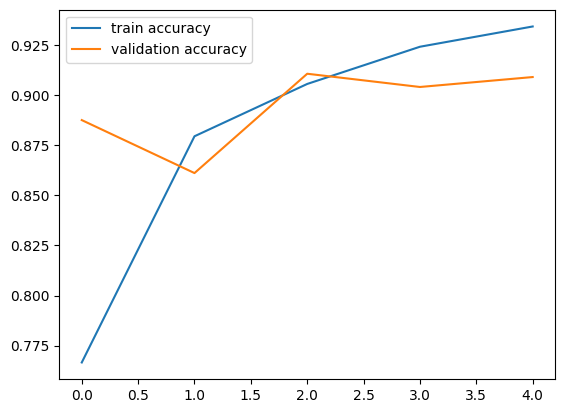

In [44]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()


Path of the image to be predicted: /content/images.jpeg


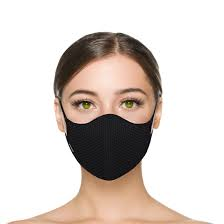

1/1 [==============================] - 0s 318ms/step
[[0.41602862 0.85752165]]
1
The person in the image is wearing a mask


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')